# Análise de Demanda de Habilidade & Respectivos Pagamentos

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_fr = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'France')].copy()

df_DA_fr['job_posted_month_num'] = df_DA_fr['job_posted_date'].dt.month

df_DA_fr_explode = df_DA_fr.explode('job_skills')

## Demanda de Habilidade

In [3]:
# Contaagem da quantidade de ocorrências por habilidade
df_skills_count = df_DA_fr_explode.groupby(['job_skills', 'job_title_short']).size()

# Nomeando coluna para contagem
df_skills_count = df_skills_count.reset_index(name='count')
df_skills_count.sort_values(by='count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,count
145,sql,Data Analyst,6213
115,python,Data Analyst,4506
108,power bi,Data Analyst,3465
155,tableau,Data Analyst,2951
41,excel,Data Analyst,2928
...,...,...,...
126,rust,Data Analyst,1
161,twilio,Data Analyst,1
159,tidyverse,Data Analyst,1
167,vb.net,Data Analyst,1


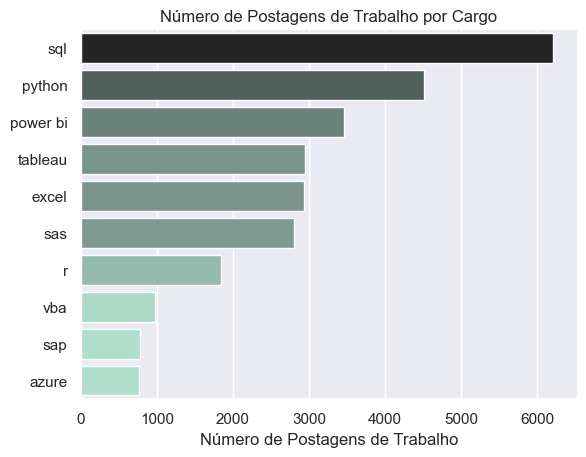

In [4]:
# Plotando por quantidade

df_skills_total = df_skills_count.head(10)

# Selecionando as cores e sua palheta
color =  "#a8e6cf"
palette = sns.dark_palette(color, as_cmap=True, reverse=True)

# Produzindo e exibindo a visualização dos dados
sns.set_theme(style='darkgrid')
sns.barplot(data=df_skills_total, x='count', y='job_skills', hue='count', palette=palette, legend=False)
sns.despine()
plt.title("Número de Postagens de Trabalho por Cargo")
plt.ylabel('')
plt.xlabel("Número de Postagens de Trabalho")
plt.show()


In [5]:
# calculando total
total = len(df_DA_fr)
total

13803

In [6]:
# calculando porcentagem

df_skills_perc = df_skills_count.copy()

df_skills_perc['percent'] = (df_skills_count['count'] / total) * 100

df_skills_perc

,job_skills,job_title_short,count,percent
145,sql,Data Analyst,6213,45.011954
115,python,Data Analyst,4506,32.645077
108,power bi,Data Analyst,3465,25.103238
155,tableau,Data Analyst,2951,21.379410
41,excel,Data Analyst,2928,21.212780
...,...,...,...,...
126,rust,Data Analyst,1,0.007245
161,twilio,Data Analyst,1,0.007245
159,tidyverse,Data Analyst,1,0.007245
167,vb.net,Data Analyst,1,0.007245


In [7]:
# Pegando top 10

df_skills_top = df_skills_perc.head(10)

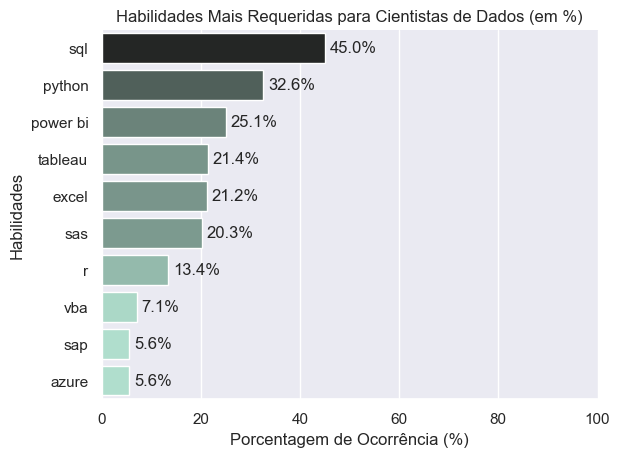

In [8]:
# Plotando o gráfico
color = "#a8e6cf"
palette = sns.dark_palette(color, as_cmap=True, reverse=True)

sns.set_theme(style='darkgrid')

# Criar o gráfico de barras
ax = sns.barplot(
    data=df_skills_top, 
    x='percent',  # Coluna de porcentagem
    y='job_skills',     # Nome da coluna de habilidades
    palette=palette, 
    hue='percent',  # Cor varia com a porcentagem
    legend=False
)

# Adicionar labels de porcentagem nas barras (opcional)
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 1,  # Posição horizontal do texto
        p.get_y() + p.get_height() / 2,  # Posição vertical do texto
        f'{width:.1f}%',  # Formatação do texto (1 casa decimal)
        ha='left', 
        va='center'
    )

# Ajustar o eixo X para 0-100
plt.xlim(0, 100)

# Configurar título e labels
plt.title("Habilidades Mais Requeridas para Cientistas de Dados (em %)")
plt.ylabel('Habilidades')
plt.xlabel("Porcentagem de Ocorrência (%)")

sns.despine()
plt.show()

## Pagamentos (Salários por Habilidade)

In [9]:
df_DA_fr_explode = df_DA_fr_explode.dropna(subset=['salary_year_avg'])
df_DA_fr_explode[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
12526,111175.0,power bi
12526,111175.0,sharepoint
12526,111175.0,excel
33317,56700.0,scala
33317,56700.0,sql


In [10]:
df_DA_pag = df_DA_fr_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_pag = df_DA_pag.head(10)

df_DA_pag

,count,median
job_skills,,
c,1,200000.0
gitlab,1,163782.0
terraform,1,163782.0
bigquery,3,111175.0
nosql,1,111175.0
php,1,111175.0
vba,3,111175.0
sharepoint,1,111175.0
kafka,3,111175.0


In [12]:
df_DA_skills = df_DA_fr_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
excel,8,96012.5
python,20,94800.0
power bi,8,92925.0
sql,28,89100.0
aws,5,89100.0
snowflake,5,89100.0
spark,5,80850.0
azure,9,80850.0
airflow,5,57500.0


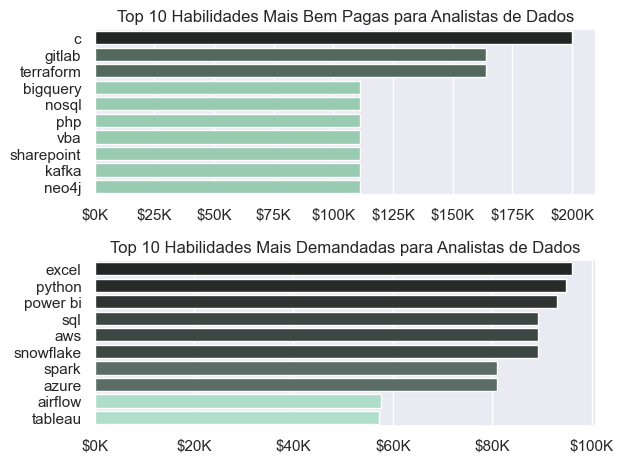

In [13]:
fig, ax = plt.subplots(2, 1)

color =  "#8fd3b0"
palette = sns.dark_palette(color, as_cmap=True, reverse=True)

sns.set_theme(style='darkgrid')
sns.barplot(data=df_DA_pag, x='median', y=df_DA_pag.index, hue='median', ax=ax[0], palette=palette)
ax[0].legend().remove()
ax[0].set_title('Top 10 Habilidades Mais Bem Pagas para Analistas de Dados')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))



color2 = "#a8e6cf"
palette2 = sns.dark_palette(color2, as_cmap=True, reverse=True)

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette=palette2)
ax[1].legend().remove()
ax[1].set_title('Top 10 Habilidades Mais Demandadas para Analistas de Dados')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()